26734
2899
uminusr Johnson fit : 3.22765815649628 2.925361456548308 2.70320961428146 0.41864271468961545
uminusr BoxCox lamda 2.840489720896153 Confidence Intervale (2.5381958848207007, 3.1507223844534678)
uminusr Normal fit : 2.6863343715667725 0.956774115562439
Need to print normal tests before & after
logmstar Johnson fit : 16.404546891695468 10.114287227532753 15.057383949938476 1.9520825090914844
logmstar BoxCox lamda 2.5736962362788938 Confidence Interval (1.8026900409950295, 3.3497081995010123)
logmstar Normal fit : 156.913330078125 19.90144157409668
Need to print normal tests before & after
metal Johnson fit : -1.0151214601108243 1.6842796188930236 0.008588034463338074 0.003482191477436989
metal BoxCox lamda 0.06923361611784608 Confidence Interval (-0.017988006585134293, 0.15681165078681875)
metal Normal fit : -3.880862236022949 0.19287875294685364
Need to print normal tests before & after
All galaxies uminusr Johnson fit : 0.8959035570553241 3.145023465180765 2.186814799672547

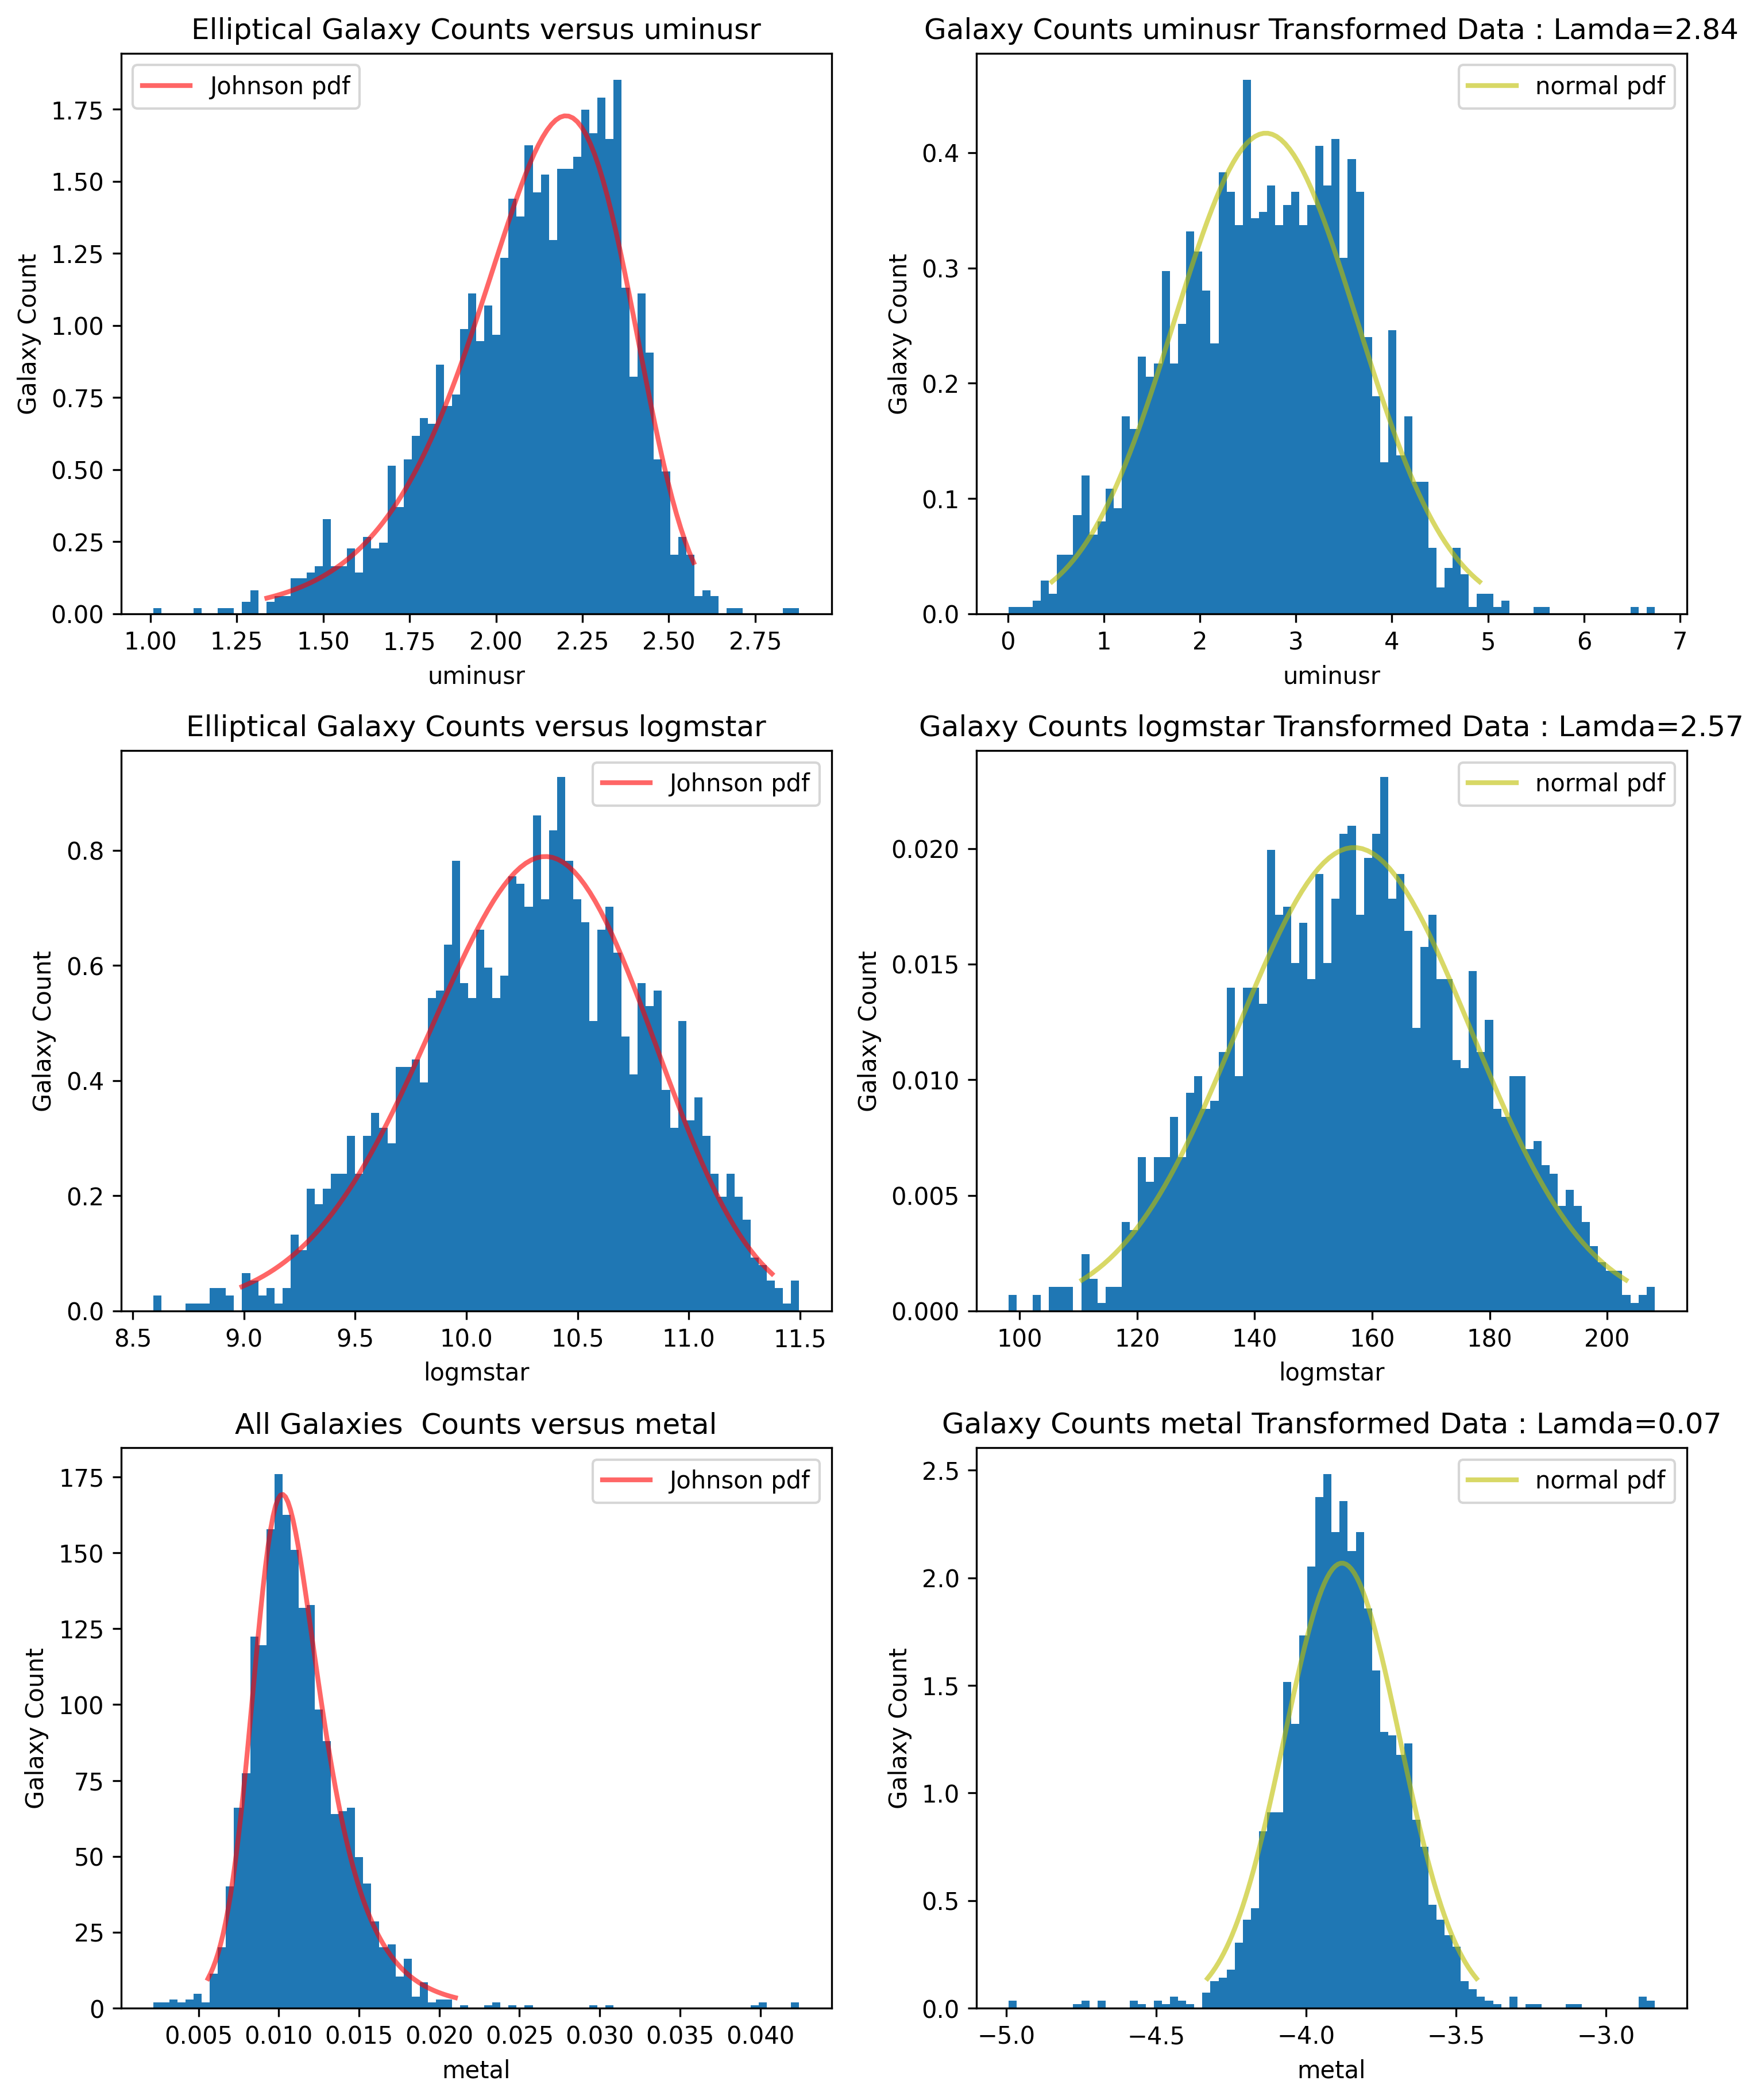

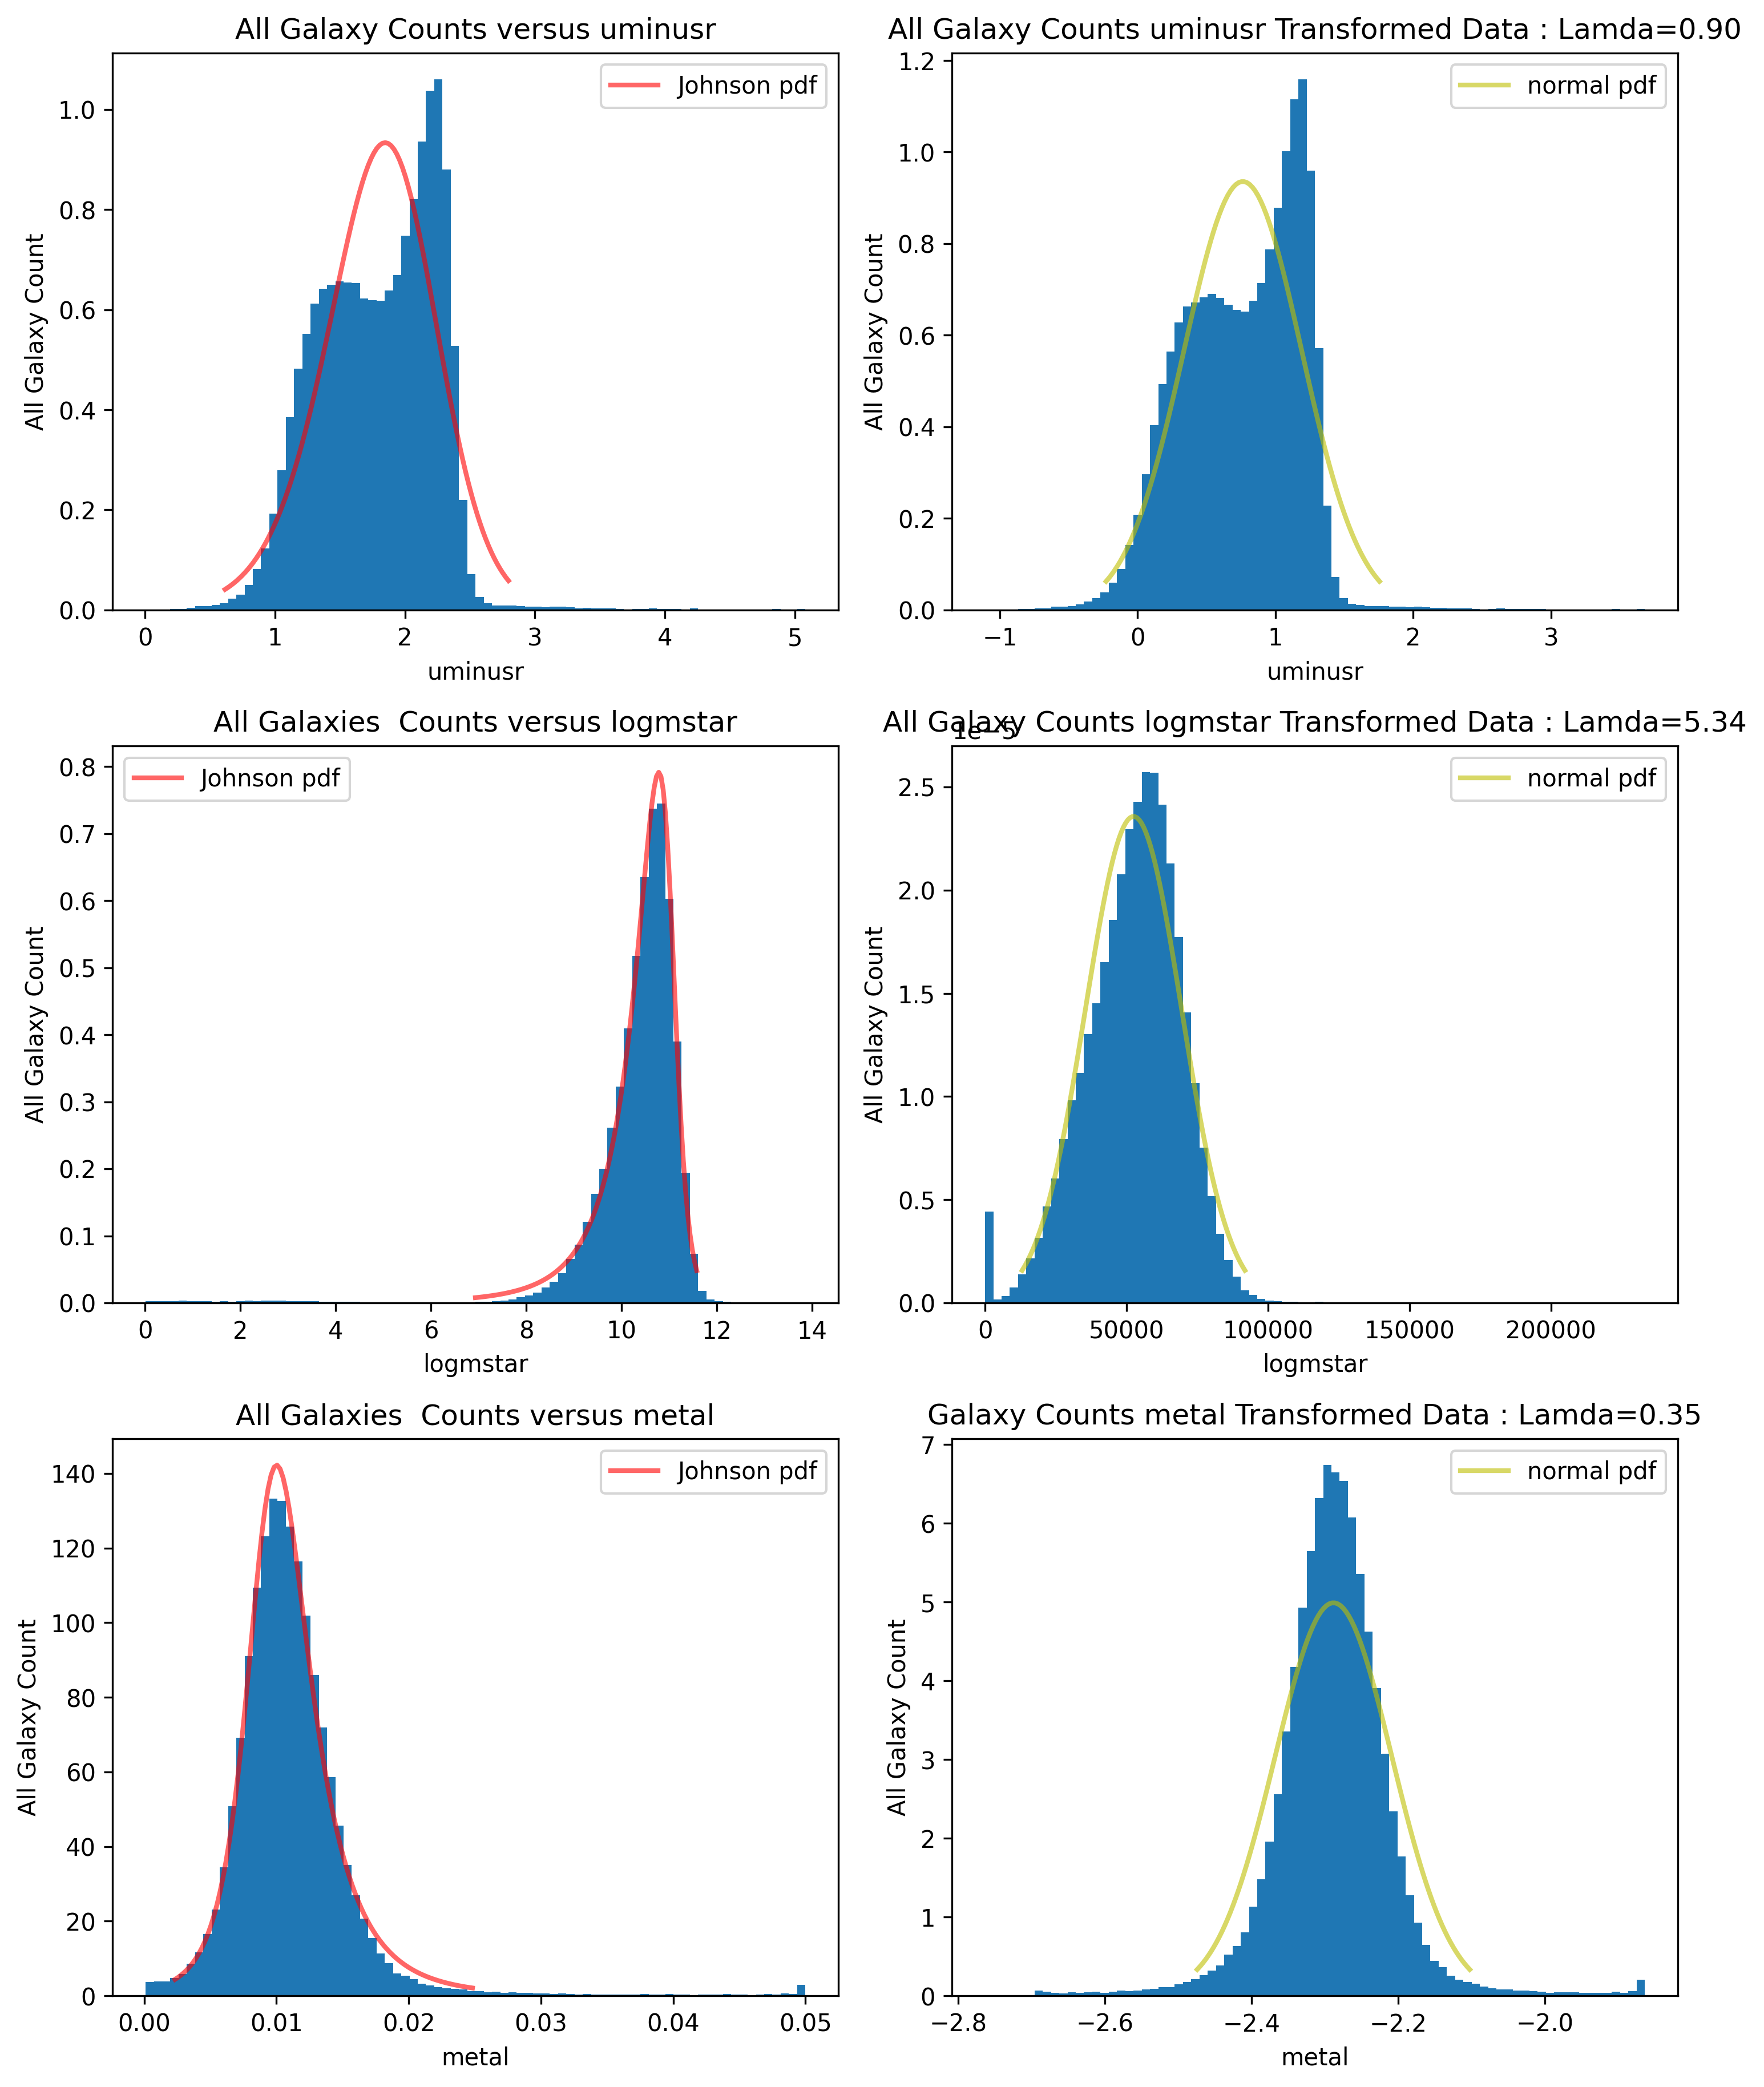

/var/folders/cj/z259fmwd41dgzl8mq8nppwd40000gn/T/ipykernel_996/4132187081.py:274: RuntimeWarning: divide by zero encountered in true_divide
  cyr = 2.84/((cx**2.84)-1)
/var/folders/cj/z259fmwd41dgzl8mq8nppwd40000gn/T/ipykernel_996/4132187081.py:275: RuntimeWarning: divide by zero encountered in true_divide
  cylm = 2.57/((cx**2.57)-1)
/var/folders/cj/z259fmwd41dgzl8mq8nppwd40000gn/T/ipykernel_996/4132187081.py:276: RuntimeWarning: divide by zero encountered in true_divide
  cym = 0.07/((cx**0.07)-1)
/var/folders/cj/z259fmwd41dgzl8mq8nppwd40000gn/T/ipykernel_996/4132187081.py:293: RuntimeWarning: divide by zero encountered in true_divide
  cyr = 1/((cx**2.84)-1)
/var/folders/cj/z259fmwd41dgzl8mq8nppwd40000gn/T/ipykernel_996/4132187081.py:294: RuntimeWarning: divide by zero encountered in true_divide
  cylm = 1/((cx**2.57)-1)
/var/folders/cj/z259fmwd41dgzl8mq8nppwd40000gn/T/ipykernel_996/4132187081.py:295: RuntimeWarning: divide by zero encountered in true_divide
  cym = 1/((cx**0.07)-1)

<function matplotlib.pyplot.show(close=None, block=None)>

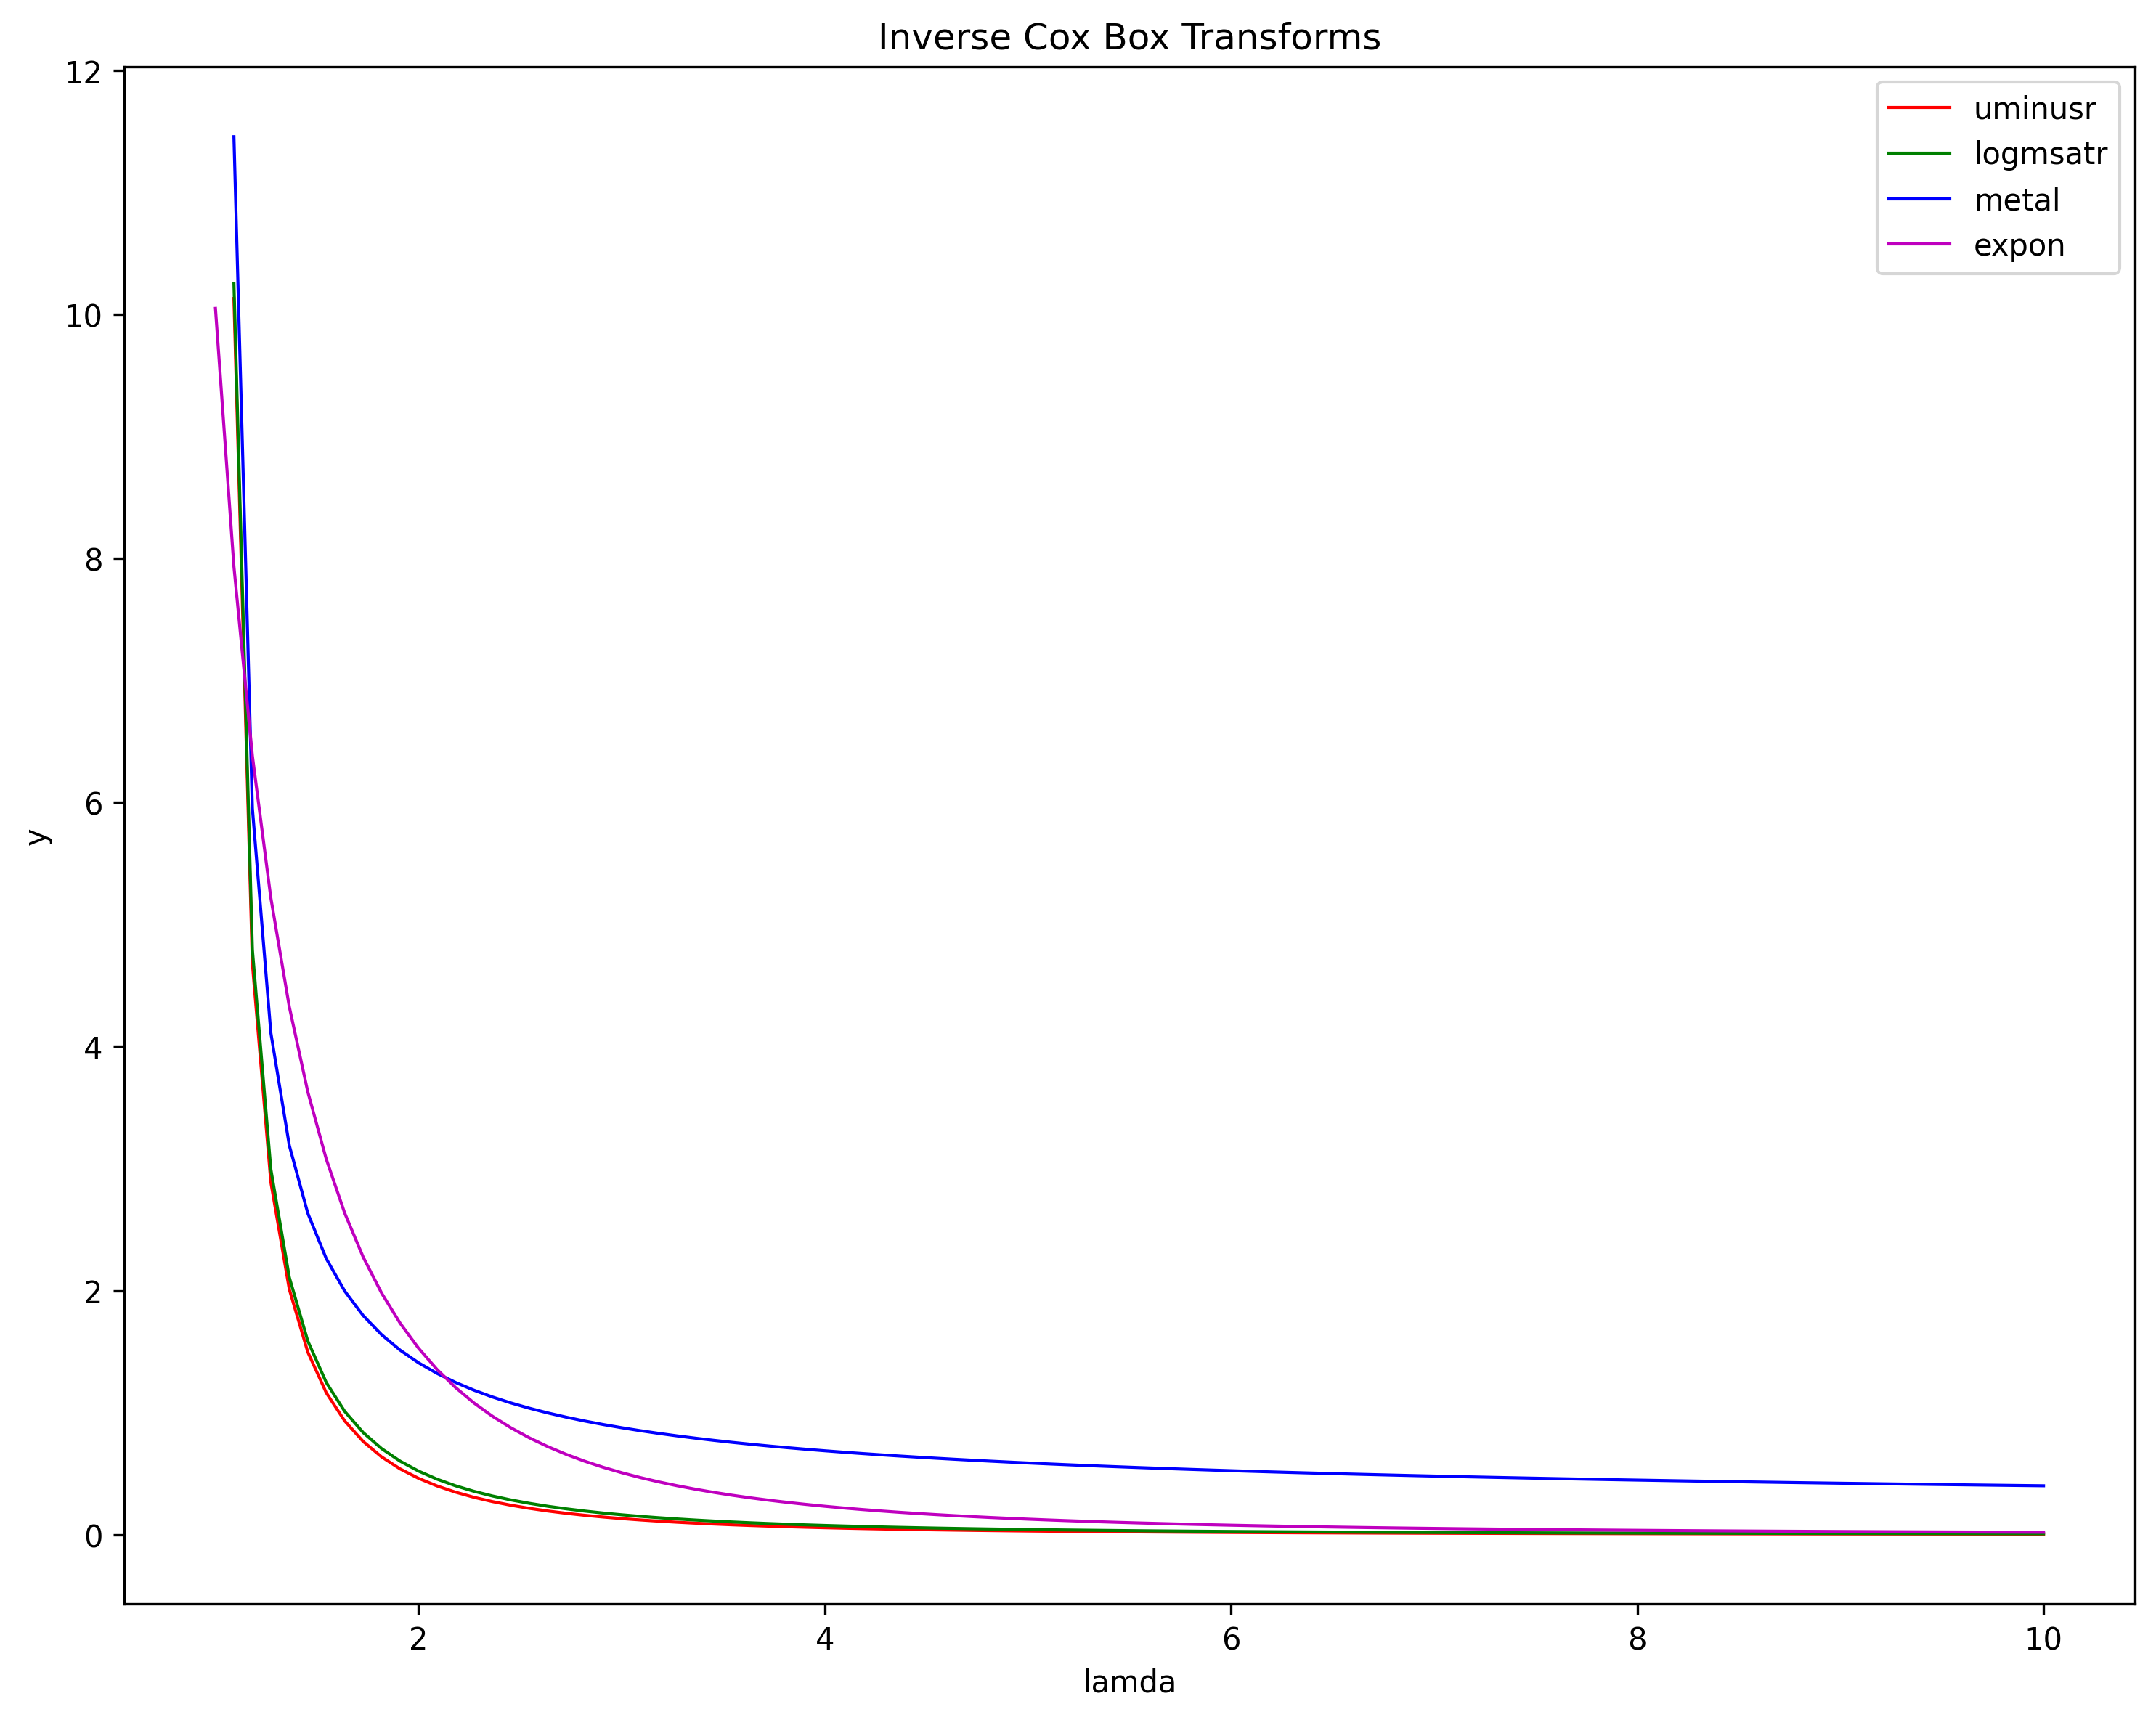

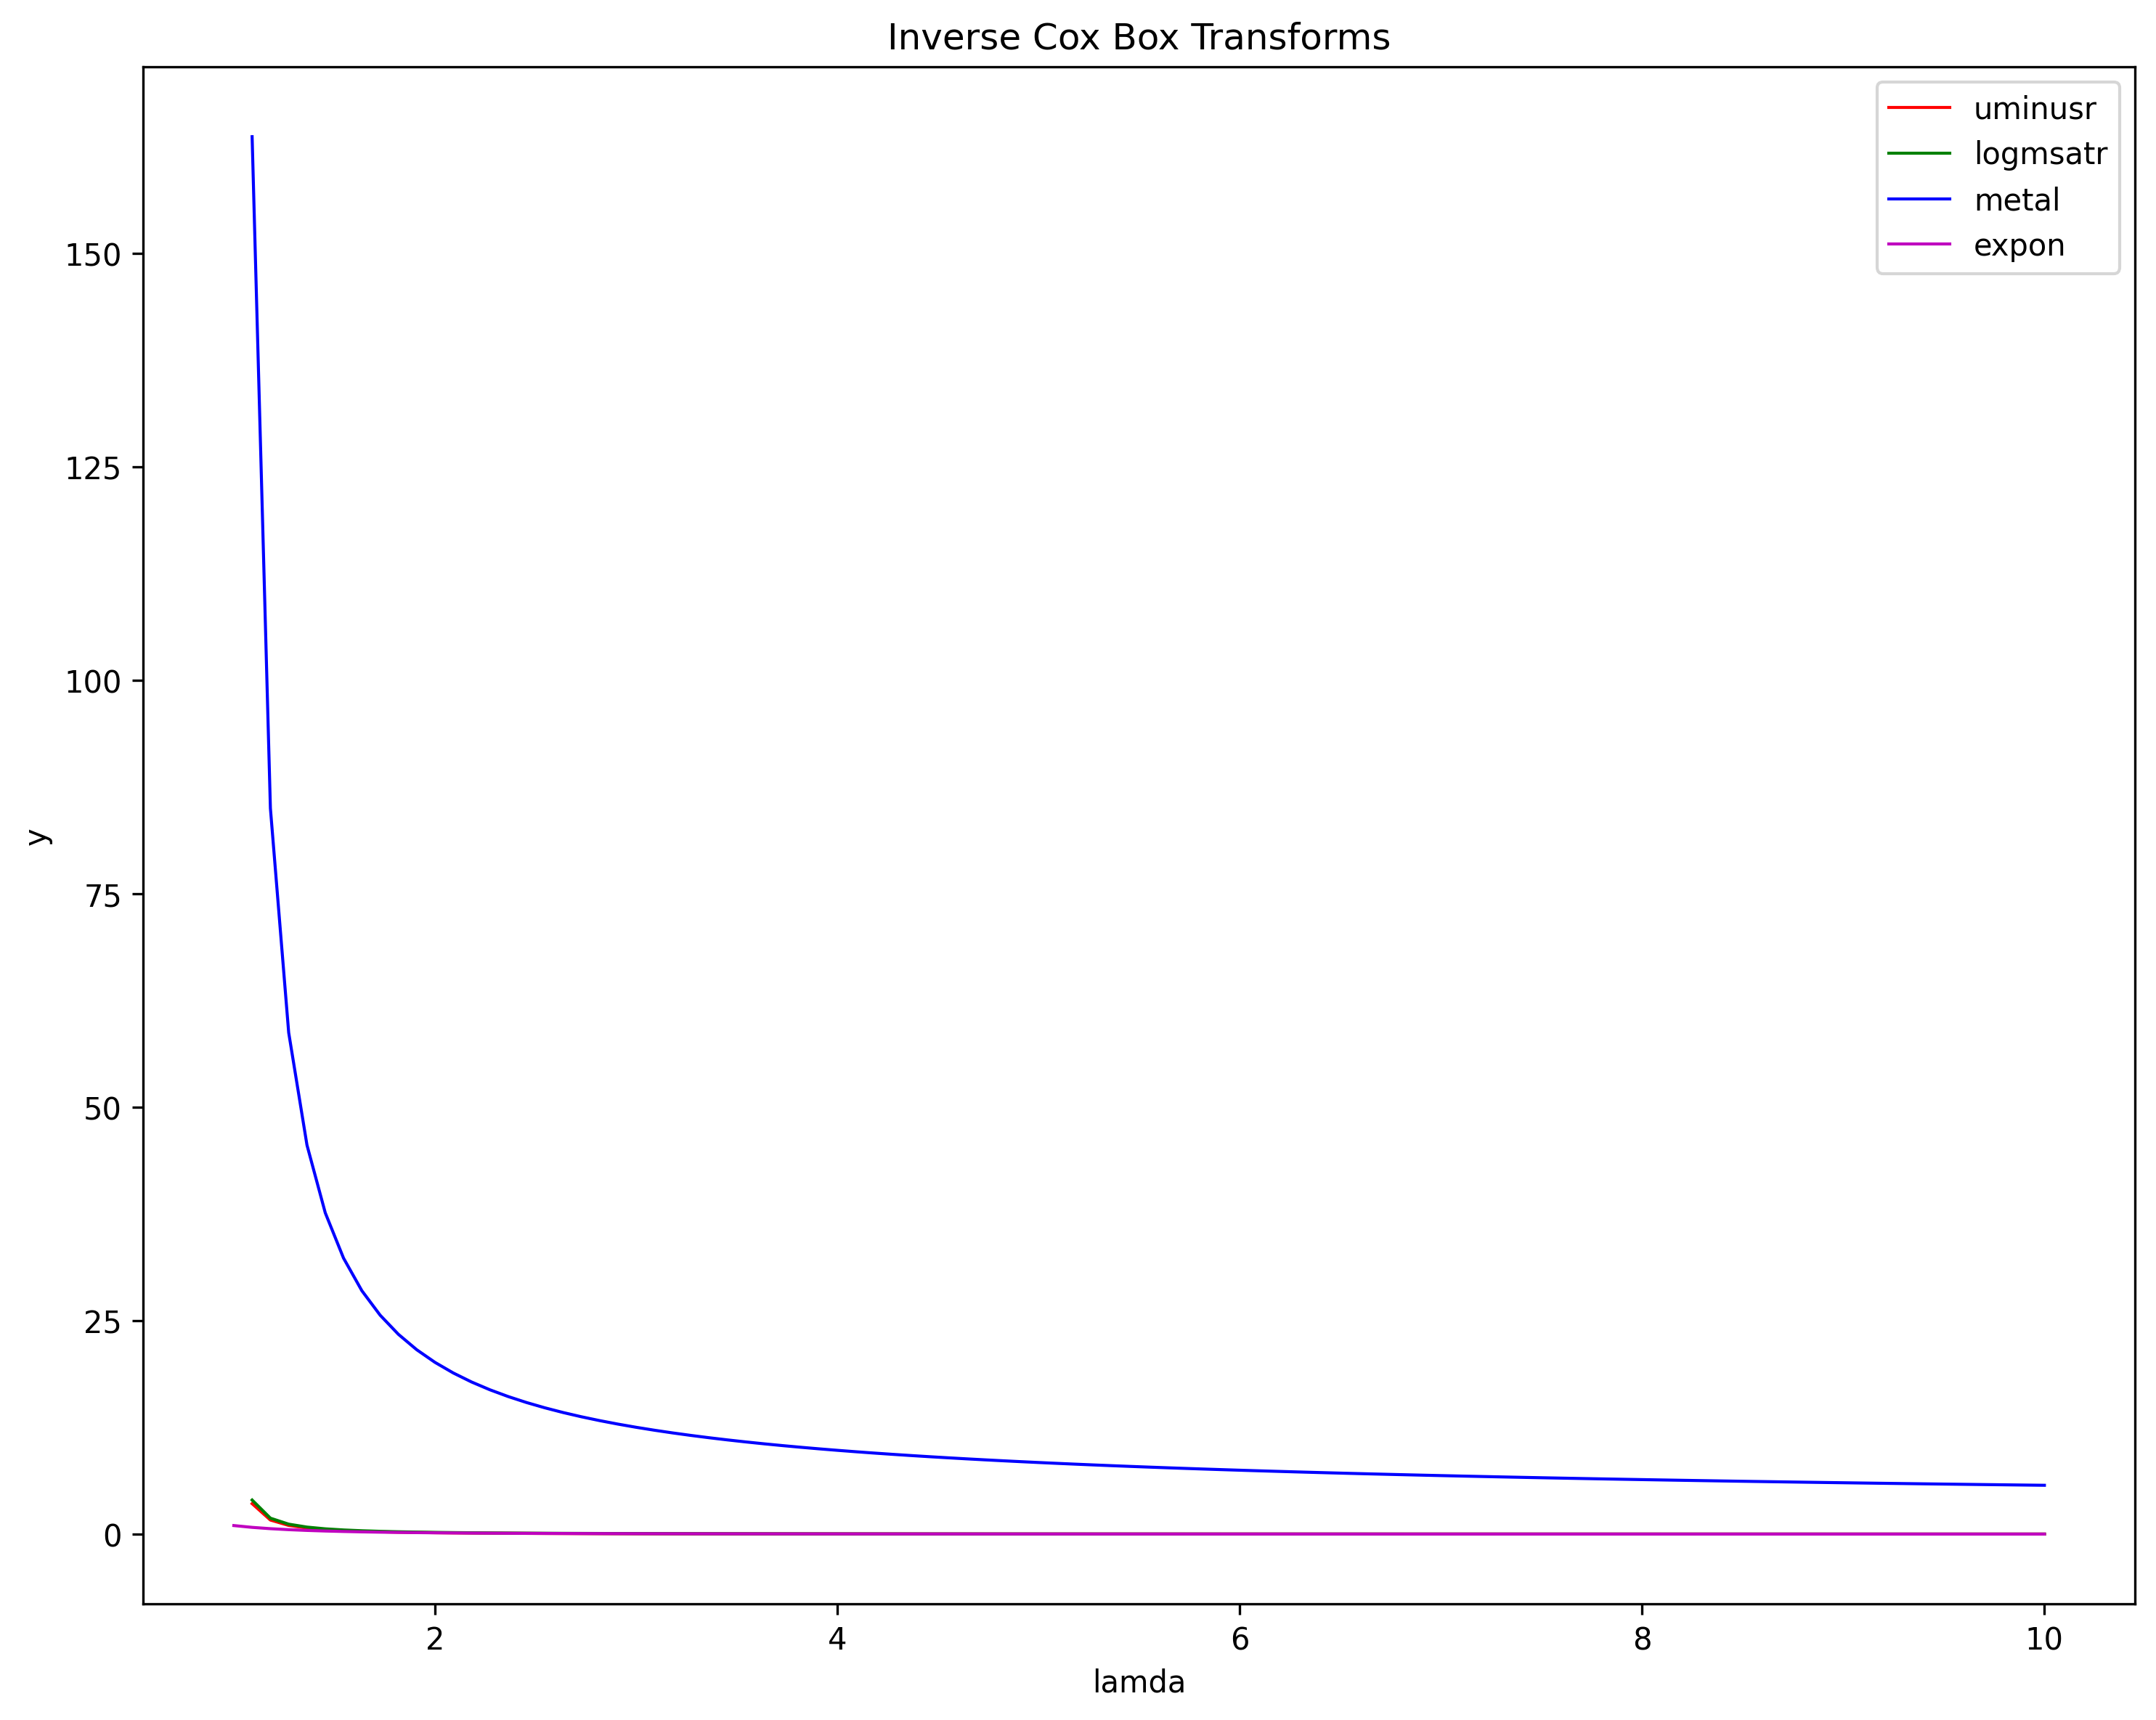

In [6]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot


stellarMasses = Table.read('../../GAMA_Data/StellarMassesv19.fits')
# Clean Data
stellarMasses = stellarMasses[stellarMasses['logmstar']> 0]
stellarMasses = stellarMasses[stellarMasses['uminusr']> 0]
stellarMasses = stellarMasses[stellarMasses['metal']> 0]
#print(RawMassEClassEmeasure.colnames)
# CLEAN DATA
RErange = Table.read('../../GAMA_Data/VisualMassClassEnviron.fits')
print(len(RErange))
RErange = RErange[RErange['ELLIPTICAL_CODE'] == 1]
print(len(RErange))
RErange = RErange[RErange['SurfaceDensityFlag'] == 0]
#RErange = RErange[RErange['DistanceTo5nnFlag'] == 0]
#RErange = RErange[RErange['SurfaceDensity'] < 50]
RErange = RErange[RErange['AGEDenParFlag'] == 0]
RErange = RErange[RErange['CountInCylFlag'] == 0]
RErange = RErange[RErange['uminusr']> 0.001]
RErange = RErange[RErange['logmstar']> 0.001]
RErange = RErange[RErange['metal']> 0.001]

binCount = 80
alpha = 1

##### uminusr
fig = plt.figure(figsize=(10, 24), dpi=300)

#fig.suptitle('Plot - Histogram Red Galaxies for Elliptical Galaxies')
#fig.legend(loc="upper right")
#import scipy.stats as stats
from scipy import stats
xfield = 'uminusr'
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#print(counts)
ax1 = fig.add_subplot(6, 2, 1)
ax1.title.set_text('Elliptical Galaxy Counts versus '+xfield)
ax1.set_ylabel('Galaxy Count')
ax1.set_xlabel(xfield)
ax1.set_xlabel('uminusr')

# Johnson on original
aj, bj, cj, dj =stats.johnsonsu.fit(RErange[xfield].data)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax1.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax1.hist(RErange[xfield].data, bins=binCount, density=True)
ax1.legend()         

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda, CI = stats.boxcox(RErange[xfield],lmbda=None, alpha = 0.05)
print(f"{xfield} BoxCox lamda {lamda} Confidence Intervale {CI}")
an ,bn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)
# y values for CoxBox
yn1 = xn**lamda-1/lamda
yn2 = (lamda / xn**lamda-1)

ax2 = fig.add_subplot(6, 2, 2)
ax2.title.set_text('Galaxy Counts '+xfield+' Transformed Data : Lamda='+'{:.2f}'.format(lamda))
ax2.set_ylabel('Galaxy Count')
ax2.set_xlabel(xfield)
ax2.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
#ax2.plot(xn,yn1,'r', label='Cox Box')
#ax2.plot(xn,yn2,'b', label='Cox Box Inverse')
ax2.hist(transdata, bins=binCount, density=True)
ax2.legend()
print("Need to print normal tests before & after")


xfield ='logmstar'
ax3 = fig.add_subplot(6, 2, 3)
ax3.title.set_text('Elliptical Galaxy Counts versus '+xfield)
ax3.set_ylabel('Galaxy Count')
ax3.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

# Johnson on original
aj, bj, cj, dj =stats.johnsonsu.fit(RErange[xfield].data)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax3.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax3.hist(RErange[xfield].data, bins=binCount, density=True)
ax3.legend()

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda, CI = stats.boxcox(RErange[xfield],lmbda=None, alpha = 0.05)
print(f"{xfield} BoxCox lamda {lamda} Confidence Interval {CI}")
an ,bn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

ax4 = fig.add_subplot(6, 2, 4)
ax4.title.set_text('Galaxy Counts '+xfield+' Transformed Data : Lamda='+'{:.2f}'.format(lamda))
ax4.set_ylabel('Galaxy Count')
ax4.set_xlabel(xfield)
ax4.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax4.hist(transdata, bins=binCount, density=True)
print("Need to print normal tests before & after")
ax4.legend()

xfield ='metal'
ax5 = fig.add_subplot(6, 2, 5)
ax5.title.set_text('All Galaxies  Counts versus '+xfield)
ax5.set_ylabel('Galaxy Count')
ax5.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

# Johnson on original
aj, bj, cj, dj =stats.johnsonsu.fit(RErange[xfield].data)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax5.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax5.hist(RErange[xfield].data, bins=binCount, density=True)
ax5.legend()

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda, CI = stats.boxcox(RErange[xfield],lmbda=None, alpha = 0.05)
print(f"{xfield} BoxCox lamda {lamda} Confidence Interval {CI}")
an ,bn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

ax6 = fig.add_subplot(6, 2, 6)
ax6.title.set_text('Galaxy Counts '+xfield+' Transformed Data : Lamda='+'{:.2f}'.format(lamda))
ax6.set_ylabel('Galaxy Count')
ax6.set_xlabel(xfield)
ax6.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax6.hist(transdata, bins=binCount, density=True)
print("Need to print normal tests before & after")
ax6.legend()
fig.tight_layout()
plt.show


fig = plt.figure(figsize=(10, 24), dpi=300)
### ALL Galaxies for Mass

xfield ='uminusr'

ax1 = fig.add_subplot(6, 2, 1)
ax1.title.set_text('All Galaxy Counts versus '+xfield)
ax1.set_ylabel('All Galaxy Count')
ax1.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

# Johnson on original
aj, bj, cj, dj =stats.johnsonsu.fit(stellarMasses[xfield].data)
print(f"All galaxies {xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax1.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax1.hist(stellarMasses[xfield].data, bins=binCount, density=True)
ax1.legend()

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda, CI = stats.boxcox(stellarMasses[xfield],lmbda=None, alpha = 0.05)
print(f"All Galaxies {xfield} BoxCox lamda {lamda} Confidence Interval {CI}")
an ,bn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

ax2 = fig.add_subplot(6, 2, 2)
ax2.title.set_text('All Galaxy Counts '+xfield+' Transformed Data : Lamda='+'{:.2f}'.format(lamda))
ax2.set_ylabel('All Galaxy Count')
ax2.set_xlabel(xfield)
ax2.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax2.hist(transdata, bins=binCount, density=True)
print("Need to print normal tests before & after")
ax2.legend()

xfield ='logmstar'

ax3 = fig.add_subplot(6, 2, 3)
ax3.title.set_text('All Galaxies  Counts versus '+xfield)
ax3.set_ylabel('All Galaxy Count')
ax3.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

# Johnson on original
aj, bj, cj, dj =stats.johnsonsu.fit(stellarMasses[xfield].data)
print(f"All galaxies {xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax3.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax3.hist(stellarMasses[xfield].data, bins=binCount, density=True)
ax3.legend()

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda, CI = stats.boxcox(stellarMasses[xfield],lmbda=None, alpha = 0.05)
print(f"All Galaxies {xfield} BoxCox lamda {lamda} Confidence Interval {CI}")
an ,bn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

ax4 = fig.add_subplot(6, 2, 4)
ax4.title.set_text('All Galaxy Counts '+xfield+' Transformed Data : Lamda='+'{:.2f}'.format(lamda))
ax4.set_ylabel('All Galaxy Count')
ax4.set_xlabel(xfield)
ax4.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax4.hist(transdata, bins=binCount, density=True)
print("Need to print normal tests before & after")
ax4.legend()

xfield ='metal'

ax5 = fig.add_subplot(6, 2, 5)
ax5.title.set_text('All Galaxies  Counts versus '+xfield)
ax5.set_ylabel('All Galaxy Count')
ax5.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

# Johnson on original
aj, bj, cj, dj =stats.johnsonsu.fit(stellarMasses[xfield].data)
print(f"All galaxies {xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax5.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax5.hist(stellarMasses[xfield].data, bins=binCount, density=True)
ax5.legend()

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda, CI = stats.boxcox(stellarMasses[xfield],lmbda=None,alpha =0.05)
print(f"All Galaxies {xfield} BoxCox lamda {lamda} Confidence Interval {CI}")
an ,bn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {an} {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

ax6 = fig.add_subplot(6, 2, 6)
ax6.title.set_text('Galaxy Counts '+xfield+' Transformed Data : Lamda='+'{:.2f}'.format(lamda))
ax6.set_ylabel('All Galaxy Count')
ax6.set_xlabel(xfield)
ax6.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax6.hist(transdata, bins=binCount, density=True)
print("Need to print normal tests before & after")
ax6.legend()

fig.tight_layout()
#fig.savefig('../../ChartsPlots/CoxboxEllipticals.png', dpi=300, bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(10, 8), dpi=300)
ax9  = fig.add_subplot(1,1,1)
ax9.title.set_text('Inverse Cox Box Transforms')
ax9.set_ylabel('y')
ax9.set_xlabel('lamda')
cx = np.linspace(1,10,100)
cyr = 2.84/((cx**2.84)-1)
cylm = 2.57/((cx**2.57)-1)
cym = 0.07/((cx**0.07)-1)
cye = 10.05*cx**(-2.71828)
ax9.plot(cx,cyr,'r',lw=alpha,label='uminusr')
ax9.plot(cx,cylm,'g',lw=alpha,label='logmsatr')
ax9.plot(cx,cym,'b',lw=alpha,label='metal')
ax9.plot(cx,cye,'m',lw=alpha,label='expon')
ax9.legend()

fig.tight_layout()
plt.show

fig = plt.figure(figsize=(10, 8), dpi=300)
ax9  = fig.add_subplot(1,1,1)
ax9.title.set_text('Inverse Cox Box Transforms')
ax9.set_ylabel('y')
ax9.set_xlabel('lamda')
cx = np.linspace(1,10,100)
cyr = 1/((cx**2.84)-1)
cylm = 1/((cx**2.57)-1)
cym = 1/((cx**0.07)-1)
cye = cx**(-2.71828)
ax9.plot(cx,cyr,'r',lw=alpha,label='uminusr')
ax9.plot(cx,cylm,'g',lw=alpha,label='logmsatr')
ax9.plot(cx,cym,'b',lw=alpha,label='metal')
ax9.plot(cx,cye,'m',lw=alpha,label='expon')
ax9.legend()

fig.tight_layout()
plt.show



